##### Exploratory Data Analysis of:
## Microsoft, Apple, Amazon, Google, Netflix, and Facebook Workplace Reviews
___

Table of contents:
1. [What insights and questions are we exploring?](#Context)
1. [Libraries, Settings and Loading the Dataset](#Libraries)
1. [Variables Assessment and Univariant Exploration](#Univariant)
1. [Bivariate and Multivariate Explorations](#Multivariate)
1. [Feature Engineering](#import)
1. [Univariant](#import)
1. [Bivariant Exploration](#bivariant)
1. [Multivariate](#import)

___

## What insights and questions are we exploring?<a name="Context"></a>

**Context:** Companies are groups of people and similar to an intelligent living, a company continuously growing, aging, evolving, experimenting, learning from its mistakes, and hope for the better future.

A review is a general take of an employee that is shaped by his/her experiences,  current and past expectations, their values and future hopes both for themselves and the company.

We have over 67k employee reviews for Google, Amazon, Facebook, Apple, Netflix, and Microsoft.  This dataset is hosted on Kaggle and was scraped from Glassdoor.


**Questions and insights we are interested in:** We are going to explore each feature in this dataset and find out based on this data
- What matters most to employees?
- At the time of the last review in our dataset, what company has been most successful in making happier employees?
- - We'd like to do this analysis valuing newer reviews higher than older ones.
- We also like to see the differences between current and past employees at the time of the review.


**Other Questions:** These are other interesting questions not directly addressed in this exploration but seem very interesting for later analysis.
- Based on this data what company seems the best choice for a specific position?
- Is there a relationship base on a company's stock market momentum its employees' happiness?
- What is each company best at making its employees happy?
- What positions seem to be happiest in each company? (and overall)
___

## Libraries, Settings and Loading the Dataset <a name="Libraries"></a>

In [1]:
# Essential Data Analysis Ecosystem
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Python Standard Libraries
import os  # os file operations
import re  # data cleaning
import webbrowser

# Specialized Libraries
from textblob import TextBlob

# set plots to be embedded inline
%matplotlib inline

two_in_row = (12, 4)  # two square plots next to each other
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

bcolor = sns.color_palette()[0]
sns.set(style='ticks', palette='pastel')

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

#### Load up the Dataset and First Look at the Data

In [2]:
dataset_path = 'input/'
df_raw = pd.read_csv(os.path.join(dataset_path, 'employee_reviews.csv'))

#### Let's look at shape of our raw data and  5  random  reviews:

In [3]:
print('Number of rows (reviews) and columns:', df_raw.shape)
df_raw_samples = df_raw.sample(5)
df_raw_samples

Number of rows (reviews) and columns: (67529, 17)


,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
34416,34417,facebook,"Menlo Park, CA","Apr 24, 2018",Current Employee - Product Marketing Manager,Incredibly talented teams,Facebook is by far the richest learning enviro...,The relatively flat org structure can create a...,Don’t lose sight of the day-to-day employee ex...,5.0,3.0,5.0,4.0,5.0,5.0,2,https://www.glassdoor.com/Reviews/Facebook-Rev...
61055,61056,microsoft,"Redmond, WA","Oct 31, 2009",Current Employee - Software Development Engineer,Why working at MS?,Lots of cool technologies. Many leading produc...,"Crowded place, can get easily lost there. Inco...",Try to understand people better. Don't just co...,3.0,2.0,none,3.0,3.5,1.0,0,https://www.glassdoor.com/Reviews/Microsoft-Re...
43572,43573,apple,"Lake Grove, NY","Feb 4, 2015",Current Employee - Specialist,Enthralling experience,If you are ambitious and competitive. Speciali...,Not a lot of training outside of core. Althoug...,Keep doing a great job!,5.0,3.0,5.0,5.0,5.0,4.0,0,https://www.glassdoor.com/Reviews/Apple-Review...
13202,13203,amazon,none,"Nov 16, 2017",Former Employee - Anonymous Employee,Ok if you like to be micromanaged,"Flexible hours, work from home",Your time is micromanaged down to the second,none,2.0,none,none,none,none,none,0,https://www.glassdoor.com/Reviews/Amazon-Revie...
41151,41152,apple,"Austin, TX","Apr 29, 2016",Former Employee - Creative,Apple Retail Store - Creative,- Got to work with a lot of really great and s...,- Having to work weekends and attend mandatory...,- Continue to improve on promoting from within...,3.0,5.0,4.0,2.0,2.0,5.0,1,https://www.glassdoor.com/Reviews/Apple-Review...


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: 

We don't see lots of missing data but that's most likely because missing data represented by string 'non'

In [5]:
df_raw.nunique()

Unnamed: 0                    67529
company                           6
location                       2044
dates                          3824
job-title                      8308
summary                       42649
pros                          66085
cons                          66049
advice-to-mgmt                35190
overall-ratings                   5
work-balance-stars               10
culture-values-stars              6
carrer-opportunities-stars       10
comp-benefit-stars               10
senior-mangemnet-stars           10
helpful-count                    99
link                           6754
dtype: int64

We have four specific categories of ratings and 1 overall rating. They should be based on a 1-star to 5-stars ratings, but there are up to 10 different vlues for those ratings that needs to be looked at and cleaned.

#### Reviews on the glassdoor.com
We can follow our sample scrapped reviews to www.glassdoor.com to see the actual reviews.

In [6]:
# links = df_raw_samples['link']
# print(links)
# answer = input('Enter,  y  if you would like to open and see these sample reviews\` urls? ')
# if answer.lower()=='y':
#     [webbrowser.open(link) for link in links]

Looking at the actual source of the data, we can see  two very likely useful peices of information in reviews are not scrapped. That is the length and type of employments. Here is 3 examples:
 - I worked at Amazon full-time (More than 3 years)
 - I have been working at Microsoft full-time (More than 10 years)
 - I have been working at Google full-time (Less than a year)

end of quick look
___

## Variables Assessment and Univariant Exploration <a name="Univariant"></a>

In [7]:
df = df_raw.copy()
drop_cols=[]  # columns to be dropped

In [8]:
df.iloc[np.random.randint(0, df.shape[0]-1)] # A detailed look at a random review

Unnamed: 0                                                                38079
company                                                                   apple
location                                                                   none
dates                                                               Dec 5, 2017
job-title                                  Former Employee - Anonymous Employee
summary                                  Financial Analyst - Budget Coordinator
pros                          Well compensated Great career opportunities Nu...
cons                          Strict management Performance evaluation is to...
advice-to-mgmt                                                             none
overall-ratings                                                               4
work-balance-stars                                                          5.0
culture-values-stars                                                        4.0
carrer-opportunities-stars              

In [9]:
# Make column names more Pandas friendly by changinh dashes to underscors
df.columns = df.columns.str.replace('-', '_') 

**1st column `Unnamed: 0` is an index and it is redundant.**

In [10]:
del df['Unnamed: 0']

**2nd Column** `company` is the company name

Companies in this data set are just names and have no order. To add more meaning for this column we will convert it to an ordinal categorical type sorted by date founded, from Microsoft to Facebook. 

In [11]:
companies_by_founded_date = ['microsoft', 'apple', 'amazon', 'netflix', 'google', 'facebook']
company_cat = CategoricalDtype(ordered=True, categories=companies_by_founded_date)
df['company'] = df['company'].astype(company_cat)
# TEST
type(df['company'].values)

pandas.core.arrays.categorical.Categorical

In [12]:
def plot_cat_counts(data=None, x=None):
    """Plot a categorical value with side by side horizantal bar and pie charts"""
    
    plt.figure(figsize=two_in_row)

    plt.subplot(1,2,1)
    sns.countplot(data=data, y=x, color=bcolor)
    plt.ylabel('')
    plt.xlabel('Review Counts')
    sns.despine() # remove the top and right borders


    plt.subplot(1,2,2)
    sorted_counts = data[x].value_counts()
    labels = sorted_counts.index

    plt.pie(sorted_counts, labels=None, 
            startangle=90, counterclock=False, wedgeprops = {'width' : 0.35})
    plt.axis('square')

    plt.legend(labels,
              title="Companies Proportions",
              loc="top left",
              bbox_to_anchor=(1, 0, .25, 1));

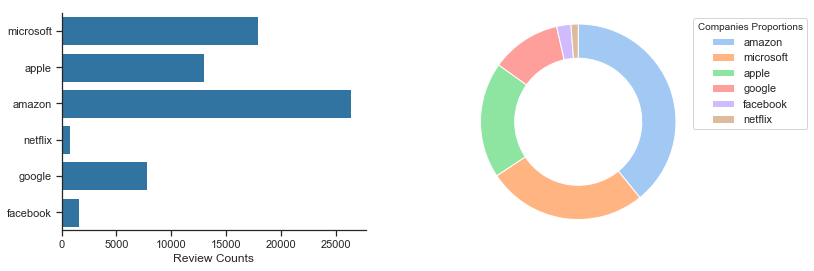

In [13]:
plot_cat_counts(df, 'company')

#### Notes:
The disproportionate distributions of reviews between these 6 companies considering their scope of operations and year founded are consistent with our expectations. Microsoft and Apple founded in the mid-seventies, Amazon founded in 1994, Netflix with a DVD rental business model in 1997, Google in 1998 and most recently Facebook in 2004. Glassdoor, the review site itself, founded in 2007.
___

**3rd Column** `location`
This dataset is global. As such, it may include the country's name in parenthesis, i.e., "Toronto, ON(Canada)"]. However, if the location is in the USA, then it only includes the city and state, i.e., "Los Angeles, CA" ]

In [14]:
df['location'].sample(10) # location column before cleaning

31569    Dublin, Co. Dublin (Ireland)
14351                            none
33839                  Cork (Ireland)
59455                     Redmond, WA
51667                     Redmond, WA
51386                     Redmond, WA
17601                Murfreesboro, TN
7092                             none
313                        Austin, TX
7631                             none
Name: location, dtype: object

#### This column is not tidy. There are 3 values of  `city, state, country` in this location column. We are going to make a column for each one of these three values.

Functions to extract "city, state, and country" values from location column to 3 columns

In [15]:
btween_parentheses = r'\(([^)]+)\)'  # Regular expression to get a string between parentheses

def get_country(location):
    """Extracts and returns country name from location string.
    Returns NaN if 'none'."""
    if location == 'none':
        return np.nan
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        return not_usa[0]
    else:
        return 'USA'
    

def get_state(location):
    """Extracts and returns state name (if aby) from location string.
    Returns Nan if 'none or not applicable."""
    if location == 'none':
        return np.nan
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        if ',' in location:
            return location.split(',')[1].split()[0]
        else:
            return np.nan
    else:
        return location.strip()[-2:]

    
def get_city(location):
    """Extracts and returns city name from location string.
    Returns Nan if 'none'."""
    if location == 'none':
        return np.nan
    not_usa = re.findall(btween_parentheses, location)
    if not_usa:
        if ',' in location:
            return location.split(',')[0]
        else:
            return location.split()[0]
    else:
        return location.split(',')[0]    

Making three columns for City, State (if applies), and Country

In [16]:
df['city'] = df['location'].apply(get_city)
df['state'] = df['location'].apply(get_state)
df['country'] = df['location'].apply(get_country)
del df['location']

In [17]:
# TEST
df[['city', 'state', 'country']].sample(5)

,city,state,country
42503,Hempstead,NY,USA
63306,NaN,NaN,NaN
60148,Redmond,WA,USA
43771,Philadelphia,PA,USA
53963,Seattle,WA,USA


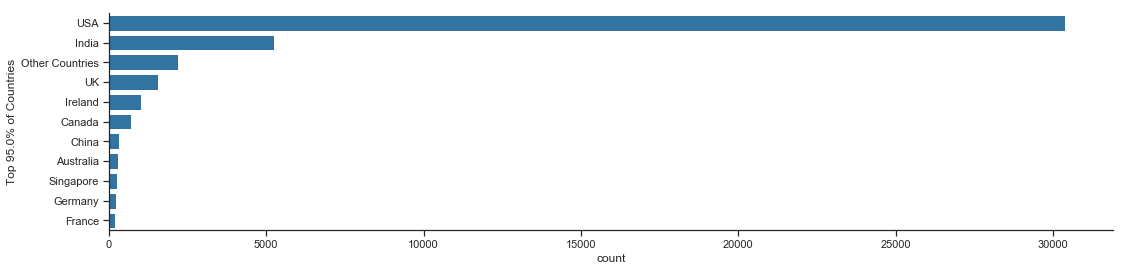

In [18]:
col='country'
top_percentage = 0.95
mask = df[col].value_counts(normalize=True).cumsum() < top_percentage
top_items = mask[mask].index

def group_top_itesm(x):
    if x in top_items:
        return x
    elif pd.isna(x):
        return np.nan
    else:
        return 'Other Countries'
items = df[col].apply(group_top_itesm)

plt.figure(figsize=(18, 4))
sns.countplot(y=items, color=bcolor, order=items.value_counts().index)
plt.ylabel(f'Top {top_percentage*100}% of Countries')
sns.despine()
del items

**Findings**
- As expected the super majority of reviews are posted in the US and India is the runner up.
- All other countries combined is the 2nd runner up.

**Notes**
- Companies day to day operations can be very different in each country. We are focusing on employees in the USA, UK, Ireland, and Canada.

In [19]:
mask = (df.country == 'USA') | (df.country == 'UK') | (df.country == 'Ireland') | (df.country == 'Canada')
df = df[mask]
df.shape

(33697, 18)

___

**4th Column** `dates` Date review posted

In [20]:
df['dates'] = pd.to_datetime(df['dates'], errors='coerce')  # Type Casting to date
df.sort_values(by='dates', ascending=False, inplace=True)  # Sort reviews by date
df.rename(columns={'dates': 'date_posted'}, inplace=True)

#### Distribution of Yearly Number of Reviews 

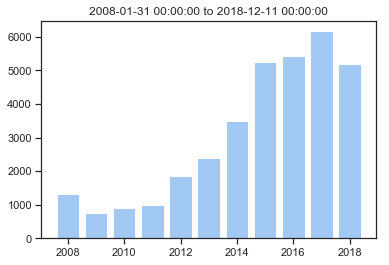

In [21]:
yearly = df.groupby(df['date_posted'].dt.year).size()
positions = yearly.index
plt.bar(positions, yearly.values)
plt.title(f'{df.date_posted.min()} to {df.date_posted.max()}');

In [22]:
yearly.sort_values(ascending=False).cumsum() / yearly.sum()

date_posted
2017.0    0.183000
2016.0    0.344067
2015.0    0.500148
2018.0    0.653737
2014.0    0.757049
2013.0    0.827655
2012.0    0.882828
2008.0    0.921707
2011.0    0.951356
2010.0    0.978038
2009.0    1.000000
dtype: float64

**Findings**
- The majority of reviews (more than 75%) are posted in the last four years.

___

**5th Column** `job-title` This string includes whether the reviewer is a 'Current' or 'Former' Employee at the time of the review. If Employee posting review Anonymously There is no value for job title and it presented with Anonymous Employee.

In [23]:
df['job_title'].sample(10) 

39537    Current Employee - Mechanical Engineer - Quality
20894                           Former Employee - Reciver
32512         Former Employee - Investigations Specialist
40993                  Former Employee - Sales Specialist
39453                           Current Employee - Expert
23039                Former Employee - ISS Representative
12357                   Current Employee - Data Associate
66075                   Former Employee - Product Manager
55655               Former Employee - Staffing Consultant
9934                   Current Employee - Account Manager
Name: job_title, dtype: object

In [24]:
def clean_text(col):
    col = col.str.strip()
    col = col.str.replace("(<br/>)", "")
    col = col.str.replace('(<a).*(>).*(</a>)', '')
    col = col.str.replace('(&amp)', '')
    col = col.str.replace('(&gt)', '')
    col = col.str.replace('(&lt)', '')
    col = col.str.replace('(\xa0)', ' ')  
    return col

df['job_title'] = clean_text(df['job_title'])

**Tidiness Problem** There are three valuess in this column. 
- Is employee current or not (past employee)
- Value for Job title or NaN if employee is anonymous
- If employee is anonymous or not

In [25]:
df['current_emp'] = df['job_title'].apply(lambda x: True if x.split()[0] == 'Current' else False)
df['anonymous'] = df['job_title'].apply(lambda x: True if 'Anonymous' in str(x) else False)

df['job_title'] = df['job_title'].apply(lambda x: x.split('-')[1])
df['job_title'] = df['job_title'].apply(lambda x: np.nan if 'Anonymous' in str(x) else x)

In [26]:
# TEST
df[['job_title', 'current_emp', 'anonymous']].sample(5)

,job_title,current_emp,anonymous
56757,Principal Software Development Lead,True,False
43750,Software Engineer,True,False
46568,Mac Specialist (Apple Store),True,False
37927,Genius,False,False
38696,Creative,True,False


In [27]:
# Most popular Job Titles in entire dataset i.e. all companies combined.
df['job_title'].value_counts()[:20]

 Software Engineer                               1423
 Software Development Engineer                    881
 Specialist                                       805
 Program Manager                                  653
 Warehouse Associate                              626
 Fulfillment Associate                            563
 Senior Software Engineer                         547
 Senior Program Manager                           538
 Software Development Engineer II                 456
 Mac Specialist (Apple Store)                     296
 Senior Software Development Engineer             266
 Product Manager                                  264
 Software Development Engineer In Test (SDET)     248
 Director                                         246
 Family Room Specialist                           244
 Area Manager                                     224
 Manager                                          221
 Senior Product Manager                           210
 Customer Service Representa

In [28]:
## Most popular group of employee wrote review in each company
df.groupby(['company', 'job_title']).size().sort_values(ascending=False)[:25]

company    job_title                                       
apple       Specialist                                         799
amazon      Warehouse Associate                                626
            Fulfillment Associate                              563
google      Software Engineer                                  508
microsoft   Program Manager                                    463
            Senior Program Manager                             461
            Software Development Engineer                      450
amazon      Software Development Engineer                      421
facebook    Software Engineer                                  356
apple       Mac Specialist (Apple Store)                       296
microsoft   Software Engineer                                  275
            Software Development Engineer II                   250
            Software Development Engineer In Test (SDET)       248
apple       Family Room Specialist                             244
mi

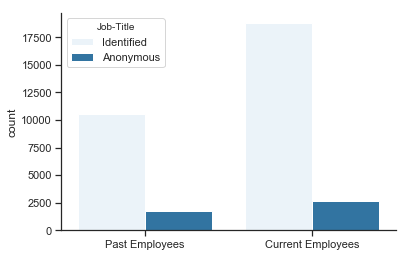

In [29]:
ax = sns.countplot(df['current_emp'], hue=df['anonymous'], color=bcolor)
ax.set_xticklabels(['Past Employees', 'Current Employees'])
ax.set_xlabel('')

ax.legend(['Identified', 'Anonymous'], 
          title="Job-Title")

sns.despine();

- Current Employees are more inclined to provide more information including their job title.
- For both past and current employees, NOT a significant number of reviews are anonymous.
____

**Columns 6th to 10th:** `summary`, `pros`, `cons`, and `advice_to_mgmt` are the actual text review content categorized in 4 different areas

In [30]:
text_cols = ['summary', 'pros', 'cons', 'advice_to_mgmt']
for col in text_cols:
    df[col] = clean_text(df[col])

df[text_cols] = df[text_cols].replace('none', np.nan)
df[text_cols] = df[text_cols].replace('None', np.nan)
df['summary'][df['summary']=='.'] = np.nan # These are actually missing values

In [31]:
df.sample(5)[text_cols]

,summary,pros,cons,advice_to_mgmt
61729,Microsoft is bland,Access to cheap software at company store,Long hours and the bathrooms are dirty,Work harder not smarter
23073,Program Manager Ops,A lot of ownership and hands on experience Man...,Poor work life balance Long hours and possibil...,NaN
46737,Apple is the dream job!,very fun atmosphere to work in and excellent p...,the hours and the misinformed customers,very fun atmosphere to work in and excellent p...
35092,A great place where you can advance readily an...,"Culture, compensation, convenience, attitude, ...","Growing fairly large, starting to lose some as...",NaN
875,Google Review,"Good work environment, fun to work at","Long hours, high competition and hard work",NaN


___

**1-Star to 5-Starts Rating Columns** `overall_ratings`, `work_balance_stars`, `culture_values_stars`, `senior_mangemnet_stars`, `carrer_opportunities_stars`, and `comp_benefit_stars` We have 1 overall rating value and 5 specific values.

In [32]:
rating_cols = ['overall_ratings', 'work_balance_stars', 'culture_values_stars',
              'carrer_opportunities_stars', 'comp_benefit_stars', 'senior_mangemnet_stars']
df[rating_cols] = df[rating_cols].replace('none', np.nan)
df['overall_ratings'].nunique()

5

In [33]:
# Rating values to Numeric
for col in rating_cols:
    df[col] = pd.to_numeric(df[col], downcast='unsigned')
    
for col in rating_cols:
    if df[col].nunique() > 5:
        print(df[col].value_counts())

4.0    8025
5.0    7272
3.0    7264
2.0    4259
1.0    4091
3.5     588
4.5     569
2.5     356
1.5     124
Name: work_balance_stars, dtype: int64
5.0    9381
4.0    8488
3.0    6997
2.0    3640
1.0    2791
3.5     548
4.5     301
2.5     288
1.5     101
Name: carrer_opportunities_stars, dtype: int64
5.0    11383
4.0    10407
3.0     5914
2.0     1866
1.0     1064
4.5      869
3.5      735
2.5      270
1.5       40
Name: comp_benefit_stars, dtype: int64
4.0    8056
3.0    7088
5.0    7003
1.0    4700
2.0    4530
3.5     311
2.5     242
4.5     219
1.5     138
Name: senior_mangemnet_stars, dtype: int64


The rating is based on a widespread scale from 1 the worst to 5 the best. Some rating values in rating columns are in between levels, i.e. 1.5, 2.5, 3.5, or 4.5. We correct these rating by lowering them one level. E.g., 1.5 to 1, 2.5 to 2. Note There are no 0.5 nor 5.5 ratings to be corrected.

Our approach is conservative here, and all mid-stars ratings are truncating to lower star rating. The other approach could be using a binomial distribution with a 50% success rate, to divide the ratings between higher and lower stars levels.

In [34]:
def five_ratings_only(col):
    for idx in col.value_counts().index:
        col[col==idx] = int(float(idx))
    return col

for col in rating_cols:
    df[col] = five_ratings_only(df[col])
    df[col].astype(np.unsignedinteger, errors='ignore')

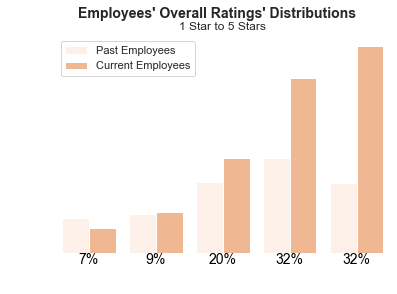

In [35]:
fig, ax = plt.subplots()

fig.suptitle('Employees\' Overall Ratings\' Distributions', fontsize=14, fontweight='bold')

color = sns.color_palette()[1]

sns.countplot(data=df, x='overall_ratings', hue='current_emp', color=color)

ax.set(title='1 Star to 5 Stars')
ax.legend(['Past Employees', 'Current Employees'])
ax.set_axis_off()

locs = ax.get_xticks()
labels = ax.get_xlabel()

counts = list(df['overall_ratings'].value_counts(normalize=True).iloc[::-1])
for loc, lable, count in zip(locs, labels, counts):

    text = '{:0.0f}%'.format(100*count)
    ax.text(loc, 0, text, color='black', va='top', ha='center', fontsize=14)

**Findings:**
 - This plot shows unhappy past employees were more inclined to leave a low review than current employees.
 - We can see the current/past ratio increases as rating stars increeases. 
 - Happier current employees are leaving higher rating reviews maybe to show their appreciation.
 - Uphappier past employees are leaving lower rating reviews maybe to be finally heard!

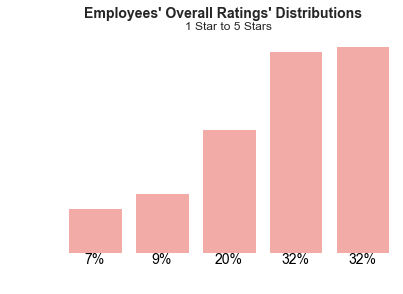

In [36]:
fig, ax = plt.subplots()

fig.suptitle('Employees\' Overall Ratings\' Distributions', fontsize=14, fontweight='bold')

color = sns.color_palette()[3]

sns.countplot(data=df, x='overall_ratings', color=color)

ax.set(title='1 Star to 5 Stars')
ax.set_axis_off()

locs = ax.get_xticks()
labels = ax.get_xlabel()

counts = list(df['overall_ratings'].value_counts(normalize=True).iloc[::-1])
for loc, lable, count in zip(locs, labels, counts):

    text = '{:0.0f}%'.format(100*count)
    ax.text(loc, 0, text, color='black', va='top', ha='center', fontsize=14)

**Findings**
- This plot is a repeat of the previous plot without distinguishing between past and current employees.
- Overall star rating shows that almost two-thirds of all employees are generally happy about companies in our data set. One-Fifth neutral and about 15% troubled. 
___

**Helpful Count Column** A count of how many people found the review to be helpful. This variable is the only numeric feature that comes with our dataset. Let's dig into it.

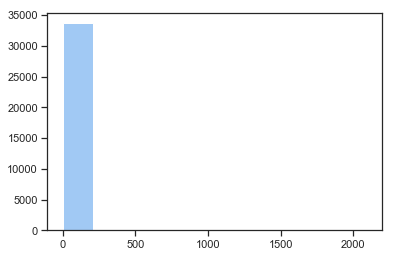

In [37]:
plt.hist(df['helpful_count']);

Our first histogram shows evidence of `extreme outliers`.

In [38]:
def hist_magnifier(df, x, xlim1, xlim2, binsize):
    plt.hist(data=df, x=x, bins=np.arange(xlim1, xlim2+binsize, binsize))
    plt.xlim(xlim1, xlim2);

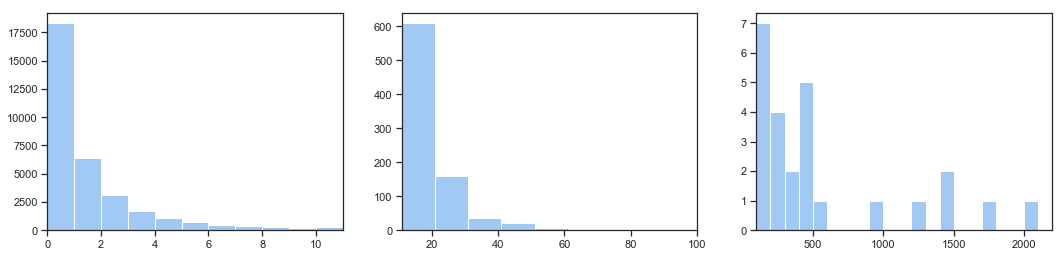

In [39]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
hist_magnifier(df, df['helpful_count'], 0, 11, 1)

plt.subplot(1, 3, 2)
hist_magnifier(df, df['helpful_count'], 11, 100, 10)

plt.subplot(1, 3, 3)
hist_magnifier(df, df['helpful_count'], 100, df['helpful_count'].max()+100, 100)

In [40]:
cum_hist = df['helpful_count'].value_counts(normalize=True).cumsum()
cum_hist[cum_hist<0.95]

0    0.543312
1    0.732736
2    0.825237
3    0.877140
4    0.909487
5    0.930854
6    0.945010
Name: helpful_count, dtype: float64

**Findings:**

- After some trial and error, we arrived with these 3 histograms. Please pay attention to count for each plot and x data range.
- More than half of the reviews have no helpful_count, i.e. no one found those reviews helpful or worthy. 
- Only 5% of reviews are found helpful by at least 5 other people
- Any helpful_count of 50 or more to the highest count of about low two thousand are far in between.

**Note:**
- We will work on this column again later when doing feature engineering.
___

**Link Column:** Direct link to the page that contains the review. This column is not required for analysis.

In [41]:
del df['link']

___

### Missing Values
 - Cleaning Missing Values
 - Plotting Missing Values' Counts

In [42]:
def plot_missings(df, figsize=two_in_row):
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(style='ticks', palette='pastel')
    color = sns.color_palette()[3]
    
    x = df.isnull().sum().index.values
    y = df.isnull().sum()
    sns.barplot(x, y, color=color, ax=ax)
    locs, labels = plt.xticks(rotation=90)
    for loc, label, missings, in zip(locs, labels, y):
        if not missings:
            ax.text(loc, 0, 'None', rotation=0, va='bottom', ha='center')
        else:
            ax.text(loc, missings, missings, rotation=0, va='bottom', ha='center')

    ax.set(title='Missing Value Counts in all Columns', xlabel='Columns', ylabel='Counts')
    sns.despine() # remove the top and right borders

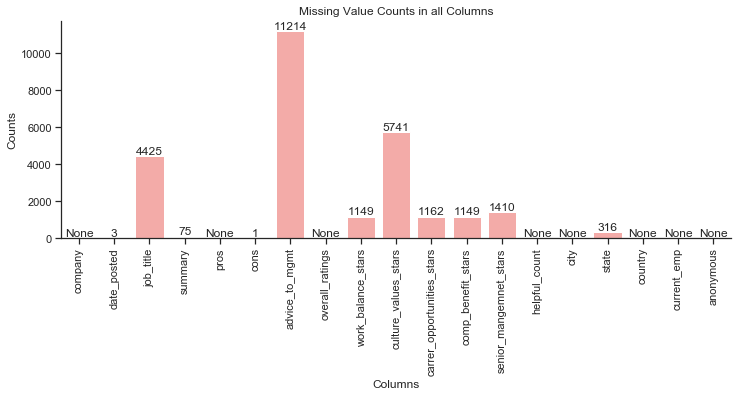

In [43]:
plot_missings(df)

- Fortunately, there are no missing values in for overall stars rating while there are many missings for other ratings the most for Culture and Values.
- We certainly want to be aware of what's missing, but in our analysis, it doesn't seem we have to drop any of these missings.

In [44]:
#looking at one review with missing `cons` comment.
df[df.cons.isnull()]

,company,date_posted,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,carrer_opportunities_stars,comp_benefit_stars,senior_mangemnet_stars,helpful_count,city,state,country,current_emp,anonymous
42755,apple,2015-07-27,NaN,a great place,everything is awesome!!,NaN,NaN,4,5.0,5.0,5.0,5.0,5.0,0,Charlotte,NC,USA,True,True


end of univariant
___

## Bivariate and Multivariate Explorations <a name="Multivariate"></a>

### 1Ratings' Patterns

One interesting pattern to discover is how the overall rating stacks against other sub-ratings. Below is exactly what are going to do.

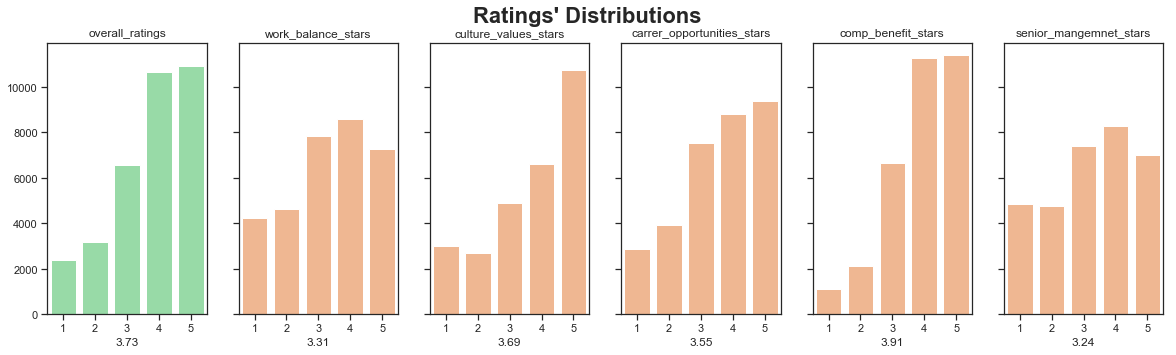

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=6, sharey=True, figsize=(20, 5))
fig.suptitle('Ratings\' Distributions', fontsize=22, fontweight='bold')
xticks=[1, 2, 3, 4, 5]
for ax, col in zip(axes, rating_cols):
    if col=='overall_ratings':
        color = sns.color_palette()[2]
    else:
        color = sns.color_palette()[1]
    ax = sns.countplot(ax=ax, data=df, x=df[col], color=color, order=xticks)
    mean = '{:0.2f}'.format(df[col].mean())
    ax.set(title=ax.get_xlabel(), xlabel=mean, ylabel='')

# TODO: Print percentage of each bar on each bar on it.

**Findings Here:**

A lot to be discussed here.

- Means of  the Overall-Rating and Culture-and-Values are closest together but the pattern or shape of distributions of  the Overall-Rating best matches with Compensations-and-Benefits.
- As said above the Overall-Rating distribution pattern best follows Compensation-and-Benefits. 
- Per these plots employees mostly are happy about their pay, or maybe this means tech employees only work where they feel happy about their pay.
- The highest negativity is about Sr. management. Lowest mean and (relatively) the highest number of 1-star ratings.
- Work-Life Balance pattern looks very similar to Sr. Management both in shape and means.

### 2 Overall Rating vs Other Ratings Trend and Averages

For each five level of the Overa Rating we have 5 other sub-ratings. That is 25 data points. We want to plot the mean of each sub-rating at every oerall rating star.

In [46]:
def ratings_trend(df=df, rating_cols=rating_cols):
    plt.figure(figsize=(7, 7))

    colors = ['grey', 'blue', 'green', 'red', 'brown']
    ypos = 4.25
    for col, color in zip(rating_cols[1:], colors):
        sns.pointplot(data=df, x='overall_ratings', y=col, color=color)
        plt.text(0.5, ypos, str(col), color=color)
        ypos += 0.15

    plt.ylim(1, 5)
    plt.grid()
    plt.xlabel('Overall Rating Stars')
    plt.ylabel('Star-Level average ratings of each Sub-Ratings vs. Overall Rating');

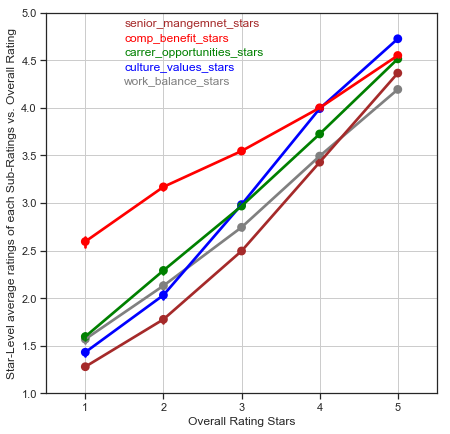

In [47]:
ratings_trend(df)

**Findings:**

This plot is gold for our analysis.

- Employees who were given the highest Overall -Rating, i.e. 5 Stars, on average, are given the highest ratings to the Culture-and-Values.
- Employees who were giving the highest overall rating, i.e. 5 Stars, on average, still are least happy with the Work-Life balance.
- For unhappy 1 or 2 stars overall rating, Sr Management seems to be the most critical issue impacting it. The runner up affecting unhappy employees in the plot is the Culture-and-Values.
- It's interesting to see the unhappier (lowest overall rating) employees are the least concern about Compensations-and-Benefits. As we can see the Compensation-Benefits has the highest mean from 1-Star to 4 Stars.

end of bivariate explorations
___

## Feature Engineering

1. Detail Factor based on review length i.e. word count
- Time Factor based on date_posted
- Helpful Factor based on number of people found a review helpful i.e. agreeing with it.
- Overall-Rating Factor, i.e. Mapping Values to the Overall-Rating Stars

- Anonymous reviews are less credible.

- Review Score = Detail-Factor * Time-Factor * Helpfulness * Overall_Rating * Anonymous-Factor

### Detail Factor based on review length i.e. word count

In real life we pay attention when someone cares and pays attention to a subject giving detailed and possibly passionate feed back on subject than short quick answers. We want ot take this fact in consideration in this data set. someone leaving a detailed review summary, pros and cons points and advise for management with about 1000 words deserve more weight (attention) than a partial quick review with 20 words. To measure this we make a new feature `detail_factor` based on the overall length of the different part s of the review. 

There 4 text columns for each review divided into `Summary`, `Pros`, `Cons`, and `Advice to Management`. 

In [48]:
text_cols = ['summary', 'pros', 'cons', 'advice_to_mgmt']

In [49]:
# Spelling Correction
for col in text_cols:
    print(col)
#     df[col] = df[col].astype(str).map(lambda text: TextBlob(text).correct())

# Counting Words
df['wordcount'] = 0
for col in text_cols:
    df['wordcount'] += df[col].astype(str).apply(lambda text: len(text.split()))

summary
pros
cons
advice_to_mgmt


In [50]:
df[text_cols].sample(5)

,summary,pros,cons,advice_to_mgmt
36665,Good company with common large company challenges,Great ambitions and the funds to throw toward ...,Middle management often political and prioriti...,Need structured goals connected at all levels ...
41319,"Exciting products but hard, sometimes frustrat...",- Compensation is very competitive - You get t...,- Hard to promote collaboration amongst teams ...,NaN
24702,"(*reviewed as a contractor*) Smart workmates, ...",-Seemed like I was surrounded by a lot of top ...,-They came up with some pretty nutty work camp...,"Contractors will always, partly of necessity, ..."
40528,Great Company and Great People,I loved working here. The people and the cultu...,I sometimes think the reputation of Apple has ...,Great job backing up your team! I like that al...
46902,Great work environment!,Good Work/life balance Work amongst smart and ...,Not very clear career progression path Cyclica...,NaN


In [51]:
df['wordcount'].describe()

count    33697.000000
mean        89.095053
std        106.784355
min          8.000000
25%         30.000000
50%         59.000000
75%        106.000000
max       3726.000000
Name: wordcount, dtype: float64

In [52]:
def distplot_closelook(series, **kwarg):
    """"""
    
    fig, ax0 = plt.subplots(1, 1, figsize=(20, 2))
    sns.boxplot(series, color=bcolor)
    
    ax0.set_xlabel(f'All {len(series)} observations')
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 2))
    sns.boxplot(series, ax=ax0, **kwarg)
    ax0.set_xlim(0, np.percentile(series, 25))
    ax0.set_xlabel(f'Bottom (left) 25% Distribution')

    sns.boxplot(series, ax=ax1, **kwarg)
    ax1.set_xlim(np.percentile(series, 75), series.max())
    ax1.set_xlabel(f'Top (right) 25% Distribution')    

count    33697.000000
mean        89.095053
std        106.784355
min          8.000000
25%         30.000000
50%         59.000000
75%        106.000000
max       3726.000000
Name: wordcount, dtype: float64

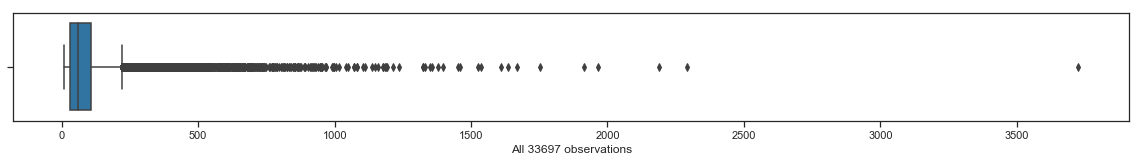

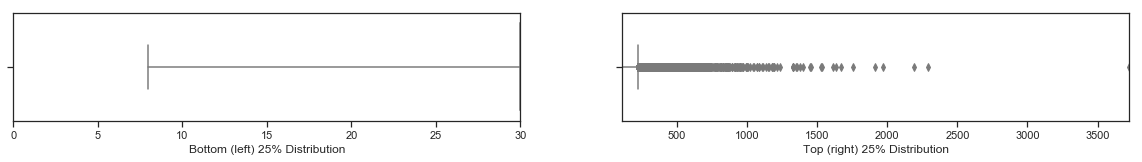

In [53]:
distplot_closelook(df['wordcount'])
df['wordcount'].describe()

I think boxen plot works great showing spread of exterem outliers in large distributions. This boxen plot shows
- An review with more than 3500 words in its comments and a couple of reviews arounf 2250.
- There are exterem outliers with more than 1000 words.

In [54]:
# Assigns values outside 92.50% boundary to boundary value. 
# In other words capping word_count to a set ceiling value.
df_clipped = df['wordcount'].clip(0, np.percentile(df['wordcount'], 92.50))

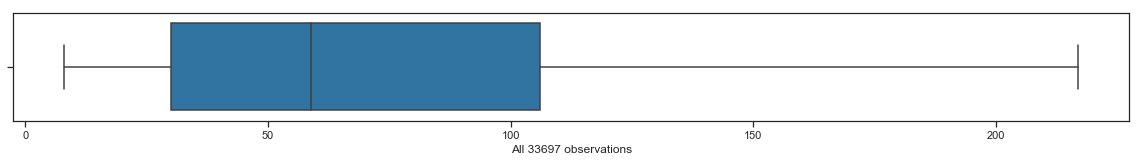

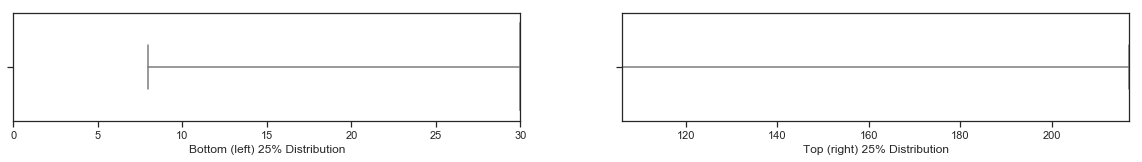

In [55]:
distplot_closelook(df_clipped)

- With trial and error, we find out that at 92.50% upper threshold, all word_count outliers included in our data without being an outlier. We didn't have to lose these reviews because of thier word_count outliers; Instead we capped them at a highest number.
- We now can bin (group) word_count values give each a weight for furthur analysis.

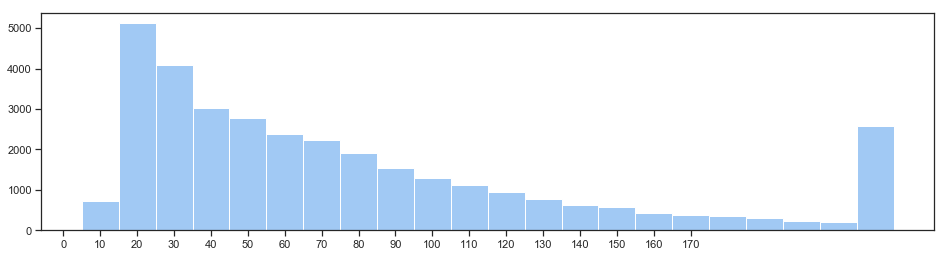

In [56]:
plt.figure(figsize=(16,4))
bin_size = 10
bins = np.arange(5, np.max(df_clipped)+bin_size, bin_size)
plt.hist(df_clipped, bins)
plt.xticks(np.arange(0, 180, 10));

- Now looking at trimmed word_count distribution, we can see with proper trimming and binning, the word_cound values can be groupped (binned for number of word counts and given a weight for each review.

In [57]:
bins

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225])

In [58]:
# assign/map each review to the bin it belongs
bin_id = pd.cut(df_clipped, bins=bins, right=False, include_lowest=True)
bin_id.head()

8119     [15, 25)
36656    [25, 35)
7914     [65, 75)
6        [15, 25)
36655    [15, 25)
Name: wordcount, dtype: category
Categories (22, interval[int64]): [[5, 15) < [15, 25) < [25, 35) < [35, 45) ... [185, 195) < [195, 205) < [205, 215) < [215, 225)]

In [59]:
# We linearly assign a score for each bin
bv = 1 / bins.shape[0]
f'Number of bins: {bins.shape[0]} - Each bins\' value: {bv} (evenly distributed over all bins)'

"Number of bins: 23 - Each bins' value: 0.043478260869565216 (evenly distributed over all bins)"

In [60]:
bins_table =  bin_id.value_counts().sort_index().to_frame().reset_index()
bins_table['bin_score'] = (bins_table.index + 2) * bv  # calculate each bin wc_score increamentally from 0 to 1
bins_table

,index,wordcount,bin_score
0,"[5, 15)",730,0.086957
1,"[15, 25)",5120,0.130435
2,"[25, 35)",4092,0.173913
3,"[35, 45)",3034,0.217391
4,"[45, 55)",2768,0.260870
5,"[55, 65)",2390,0.304348
6,"[65, 75)",2244,0.347826
7,"[75, 85)",1922,0.391304
8,"[85, 95)",1533,0.434783
9,"[95, 105)",1302,0.478261


In [61]:
mapping_series = pd.Series(data=bins_table['bin_score'].values, index=bins_table['index'])  # make a series with bins' names (edges) as index and bin_score as value
mapping_series.head()

index
[5, 15)     0.086957
[15, 25)    0.130435
[25, 35)    0.173913
[35, 45)    0.217391
[45, 55)    0.260870
dtype: float64

In [62]:
df['detail_factor'] = bin_id.map(mapping_series)  # for each review, map the weight/score of the bin it beloges t
df[['wordcount', 'detail_factor']].sample(5)

,wordcount,detail_factor
9353,38,0.217391
43150,51,0.260870
42020,46,0.260870
21545,27,0.173913
20560,65,0.347826


end of engineering wordcount_factor
___

### Time Factor based on date_posted


We are interested in the direction and how a workplace is evolving than just averaging historic data. A recent review must have much higher weight than a review of 5 years ago. To take this into consideration we define a new feature `timefactor` that is from (0 to 1). 1 for a review left today and zero for 5 years (1826 days) or beyond.

This is a linear weight system we choose to use; Perhaps it is not  the most optimal but it should be practical enough for our dataset for initial experiemnts. 

In [67]:
max_days = 5 * 364.25 
df['review_days'] = pd.to_numeric((pd.datetime.today() - df['date_posted']).dt.days)
df['time_factor'] = df['review_days'].apply(lambda x: 1 - x/max_days if x < max_days else 0.0)

In [63]:
def get_timefactor(date_col, years):
    max_days = years * 365
    review_days = pd.to_numeric((pd.datetime.today() - date_col).dt.days)
    return review_days.apply(lambda x: 1 - x/max_days if x < max_days else 0.0)

In [64]:
years = [year for year in range(1, 10)]
years_cols = ['year'+str(year) for year in years]

In [65]:
for yr, yr_col in zip(years, years_cols):
    df[yr_col] = get_timefactor(df['date_posted'], yr)
    print(yr)

1
2
3
4
5
6
7
8
9


In [68]:
df

,company,date_posted,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,...,year2,year3,year4,year5,year6,year7,year8,year9,review_days,time_factor
8119,amazon,2018-12-11,Sorter,Ok Starter Job,"Predictable schedule, No big curveballs",When change happens it tends to throw everybod...,Listen to workers opinions more,1,1.0,1.0,...,0.839726,0.893151,0.919863,0.935890,0.946575,0.954207,0.959932,0.964384,117.0,0.935758
36656,apple,2018-12-11,Systems Design Engineer,Great place to work and gain experience,"Good benefits, very good experience, recogniza...","Somewhat lower pay, difficult to advance in ca...",NaN,4,2.0,5.0,...,0.839726,0.893151,0.919863,0.935890,0.946575,0.954207,0.959932,0.964384,117.0,0.935758
7914,amazon,2018-12-11,Warehouse Associate,Toxic Environment,"Good pay, good benefits. They'll work w/ you &...","Long hours, unfair treatment. Poor management,...",Anyone that's going to be manager there should...,2,2.0,1.0,...,0.839726,0.893151,0.919863,0.935890,0.946575,0.954207,0.959932,0.964384,117.0,0.935758
6,google,2018-12-11,Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,NaN,5,5.0,4.0,...,0.839726,0.893151,0.919863,0.935890,0.946575,0.954207,0.959932,0.964384,117.0,0.935758
36655,apple,2018-12-11,Mac Genius,Genius,Great benefits for retail store Co-workers are...,"Work you to the minute, lots of micro-managing",NaN,4,3.0,5.0,...,0.839726,0.893151,0.919863,0.935890,0.946575,0.954207,0.959932,0.964384,117.0,0.935758
7907,amazon,2018-12-11,Director,Director,"Work hard, work hard, work hard. May be make h...",Little regards to people and their well being.,Success at all cost may not be a long term thi...,3,2.0,4.0,...,0.839726,0.893151,0.919863,0.935890,0.946575,0.954207,0.959932,0.964384,117.0,0.935758
34249,facebook,2018-12-11,Product Operations,2nd Job out of college --> Great Experience,Context: I worked in operations - Very entrepr...,- Very entrepreneurial culture: There is no fo...,NaN,5,4.0,4.0,...,0.839726,0.893151,0.919863,0.935890,0.946575,0.954207,0.959932,0.964384,117.0,0.935758
25345,amazon,2018-12-11,Warehouse Associate,Warehouse,free drinks and free paarkimg so its good,long hours and 10hr shifts,NaN,4,2.0,1.0,...,0.839726,0.893151,0.919863,0.935890,0.946575,0.954207,0.959932,0.964384,117.0,0.935758
25451,amazon,2018-12-11,Ex Employee,"Very busy, Hard working, demanding",Can be flexible regarding you to taking holida...,"It is full of favoritism, no equal opportuniti...",Not going to listen you.,2,1.0,1.0,...,0.839726,0.893151,0.919863,0.935890,0.946575,0.954207,0.959932,0.964384,117.0,0.935758
25350,amazon,2018-12-10,Datacentre Technician,Datacentre Technician,You get hands on experience,It's a lot of hard work,NaN,4,2.0,3.0,...,0.838356,0.892237,0.919178,0.935342,0.946119,0.953816,0.959589,0.964079,118.0,0.935209


In [ ]:
sns.lineplot(data=df, x=df['date_posted'], y=df['time_factor']);

This plot confirms linear weightig of our reviews over the last 5 years.
____

### Helpful Factor based on number of people found a review helpful i.e. agreeing with it

To take helpful_count into account every 3 people finding a review helpful counts as a new review

In [ ]:
df['helful_factor'] = df['helpful_count'].apply(lambda x: 1 + x/3)

In [ ]:
plt.figure(figsize=(20, 4))
sns.boxenplot(df['helpful_count']);

As seen earlier in this notebook the feature has lots of exterem outliers, but this outliers (as long as they are not errors) don't distort our analysis and shall not be discarded.

### Assigning Numeric Score Value to Rating Stars

We use a scoring mapping as follows:
- 5 Stars: 1.00
- 4 Stars: 0.75
- 3 Stars: 0.50
- 2 Stars: 0.25
- 1 Star:  0.00

In [ ]:
df['stars_score'] = df['overall_ratings'].apply(lambda x: (int(x) - 1) / 4)
df[['stars_score','overall_ratings']].sample(5)  # Test

___

### Total Review Score

stars_score * detail_factor * helful_count_factor * time_factor


In [ ]:
df['total_score'] = df['stars_score'] * df['detail_factor'] * df['helful_factor'] * df['time_factor']

In [ ]:
df.groupby('company').mean()

In [ ]:
plt.figure(figsize=(18,4))
sns.barplot(data=df, x='company', y='total_score');

In [ ]:
for col in text_cols:
    df[f'sentiment_{col}'] = df[col].map(lambda x: np.nan if pd.isnull(x) else TextBlob(x).sentiment.polarity)